In [2]:
import sys; sys.path.append('..'); from wwa import *

In [98]:
def get_ranks(fnm):
    
    # load data, mask to just land surface above 60S
    if "monthly" in fnm:
        da = wrap_lon(xr.open_dataset(fnm))
    else:
        da = wrap_lon(decode_times(xr.open_dataset(fnm, decode_times = False)))
    da = da.where(regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(da) == 0)
    da = da.where(da.lat > -60)
    da = da[list(da.data_vars)[0]]

    # compute ranks
    ranks = da.sel(time = slice("1995","2024")).rank("time")
    # original method computed among 1991-2020
#     ranks = xr.concat([da.sel(time = slice("1991","2020")).rank("time")] + 
#                   [xr.concat([da.sel(time = slice("1991","2020")), da.sel(time = str(y))], "time").rank("time").sel(time = str(y)) for y in [2021,2022,2023,2024]], "time")

    # flatten & remove null values for histogram
    ranks_flattened = ranks.stack(xy = ["lat", "lon"]).dropna("xy", "all")
    
    return ranks, ranks_flattened

In [99]:
def compare_ranks(y1 = 2024, y2 = 2023, ax = None, y1_col = "gold", legend_pos = "upper left"):
    
    if not ax: ax = plt.gca()
        
    rmax = int(ranks_flattened.max().values)
        
    if y2 is not None:
        ax.hist(ranks_flattened.sel(time = str(y2)).squeeze(drop = True), density = True, bins = range(1,rmax+1), alpha = 0.5, label = str(y2))
        y1_col = "none"
        
    ax.hist(ranks_flattened.sel(time = str(y1)).squeeze(drop = True), density = True, bins = range(1,rmax+1), edgecolor = "k", facecolor = y1_col, label = str(y1), color = y1_col)

    ax.axhline(y = 1/rmax, color = "darkred", ls = "--")
    ax.margins(x = 0)
    ax.legend(loc = legend_pos)

# rx5day

In [65]:
ranks, ranks_flattened = get_ranks("data/era5_prcp_daily_1_max_30_5v.nc")

Text(0.5, 0.95, 'Rank of rx5day among 1995-2024')

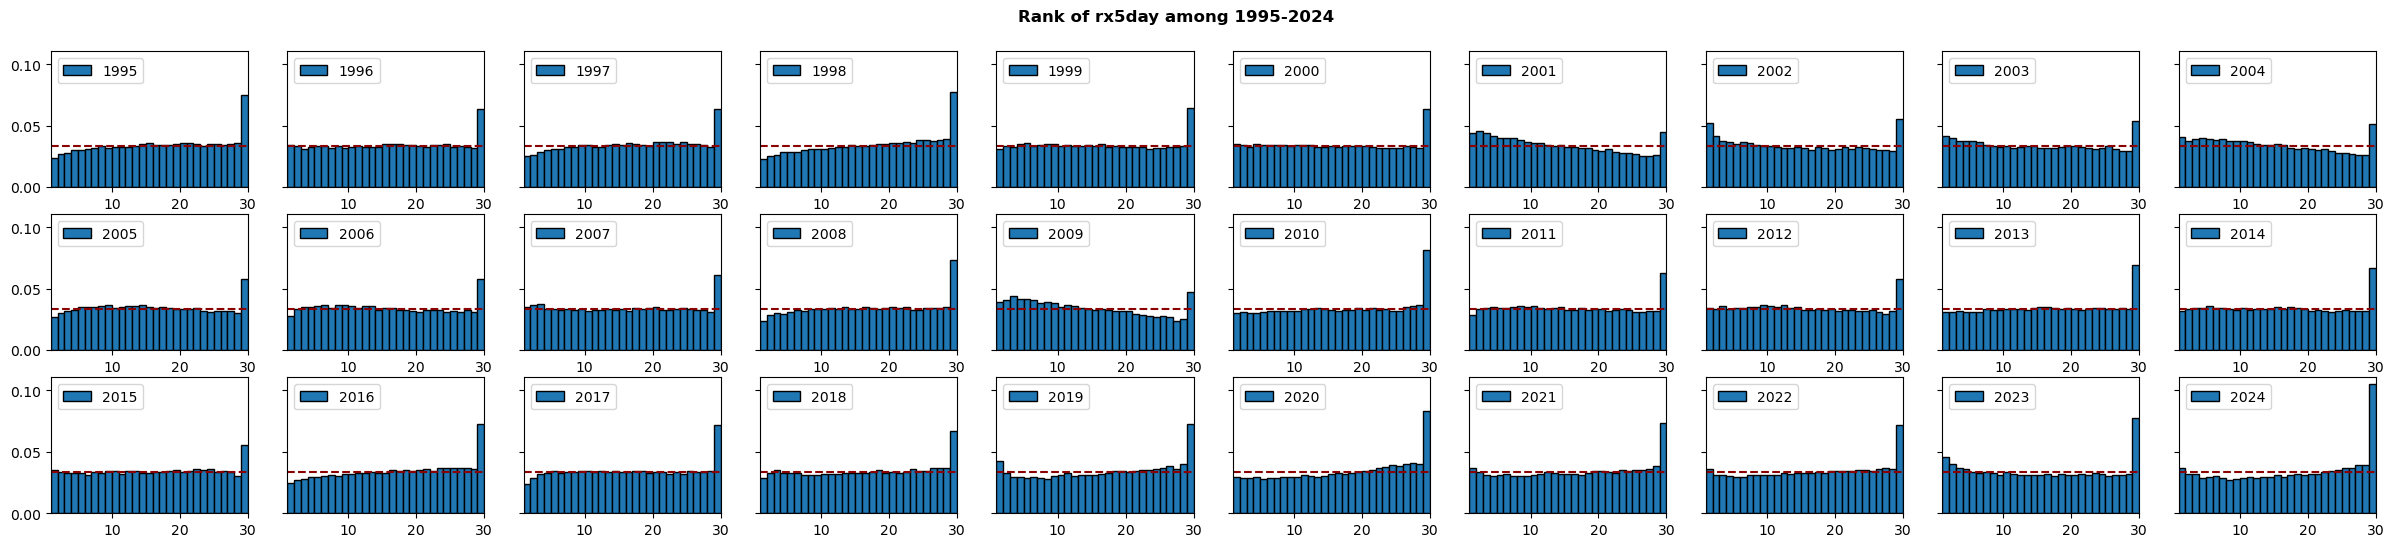

In [66]:
nc = 10; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*3,nr*2), dpi = 100, sharex = "row", sharey = True)
[compare_ranks(range(1995,2025)[i], None, ax = axs.flatten()[i], y1_col = "tab:blue") for i in range(min(nc*nr, 34))]
if nc*nr > 34: 
    for i in range(34, nc*nr): axs.flatten()[i].set_axis_off()
fig.suptitle("Rank among 1995-2024", fontweight = "bold", y = 0.95)

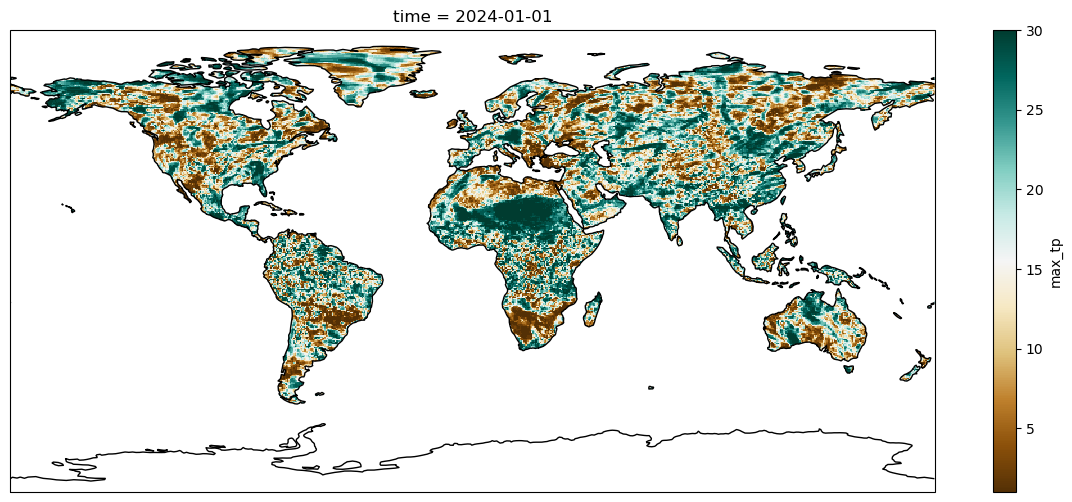

In [67]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar = ranks.sel(time = "2024").plot(ax = ax, vmin = 1, vmax = 30, cmap = "BrBG")
ax.coastlines()

# tx1x

In [77]:
ranks, ranks_flattened = get_ranks("data/era5_tmax_daily_1_max_50.nc")

Text(0.5, 0.95, 'Rank of tx1x among 1991-2020')

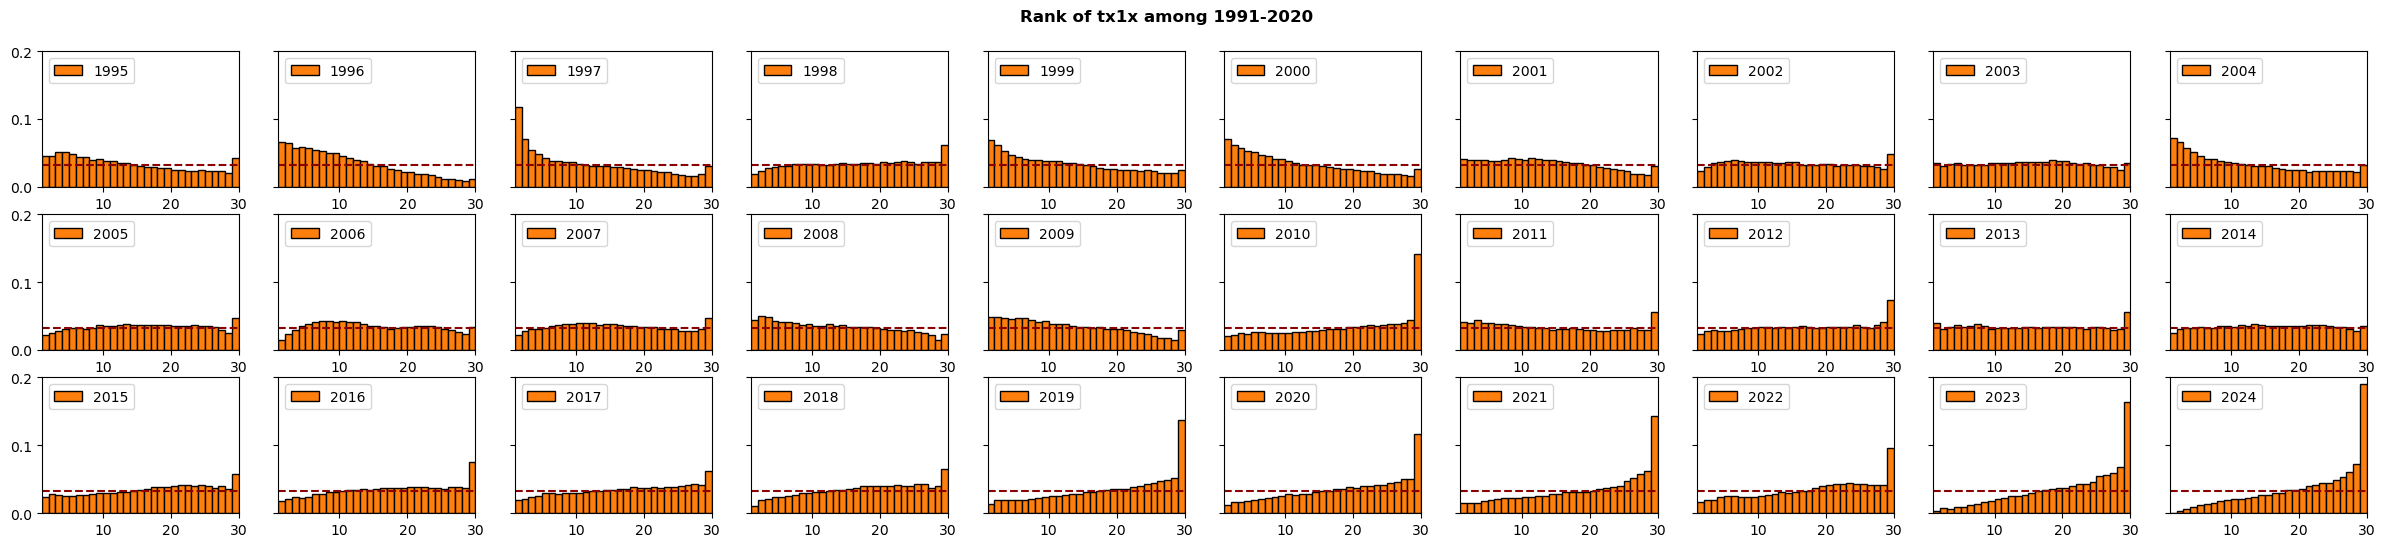

In [78]:
nc = 10; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*3,nr*2), dpi = 100, sharex = "row", sharey = True)
[compare_ranks(range(1995,2025)[i], None, ax = axs.flatten()[i], y1_col = "tab:orange") for i in range(min(nc*nr, 34))]
if nc*nr > 34: 
    for i in range(34, nc*nr): axs.flatten()[i].set_axis_off()
fig.suptitle("Rank among 1995-2024", fontweight = "bold", y = 0.95)

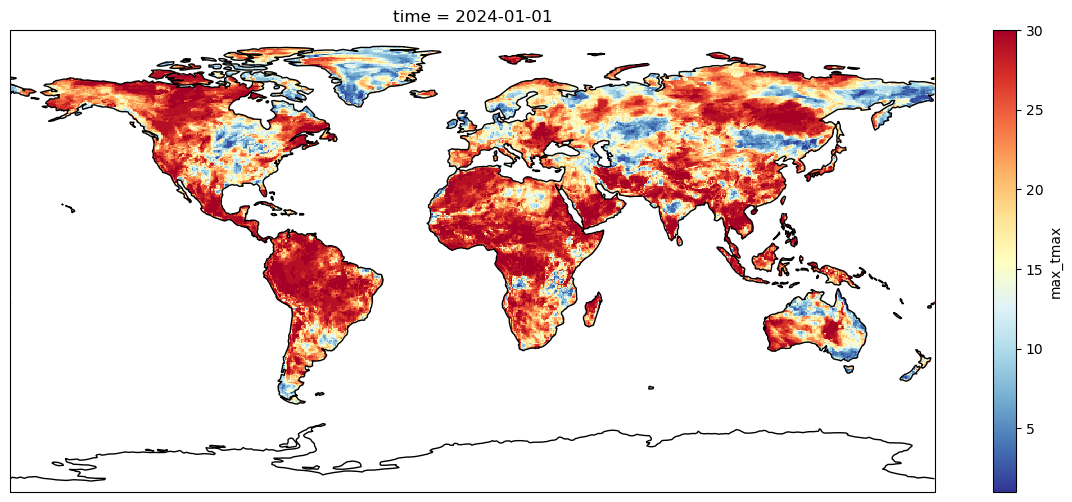

In [79]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar = ranks.sel(time = "2024").plot(ax = ax, vmin = 1, vmax = 30, cmap = "RdBu_r")
ax.coastlines()

# tn1x

In [80]:
ranks, ranks_flattened = get_ranks("data/era5_tmin_daily_1_max_30.nc")

Text(0.5, 0.95, 'Rank of tn1x among 1991-2020')

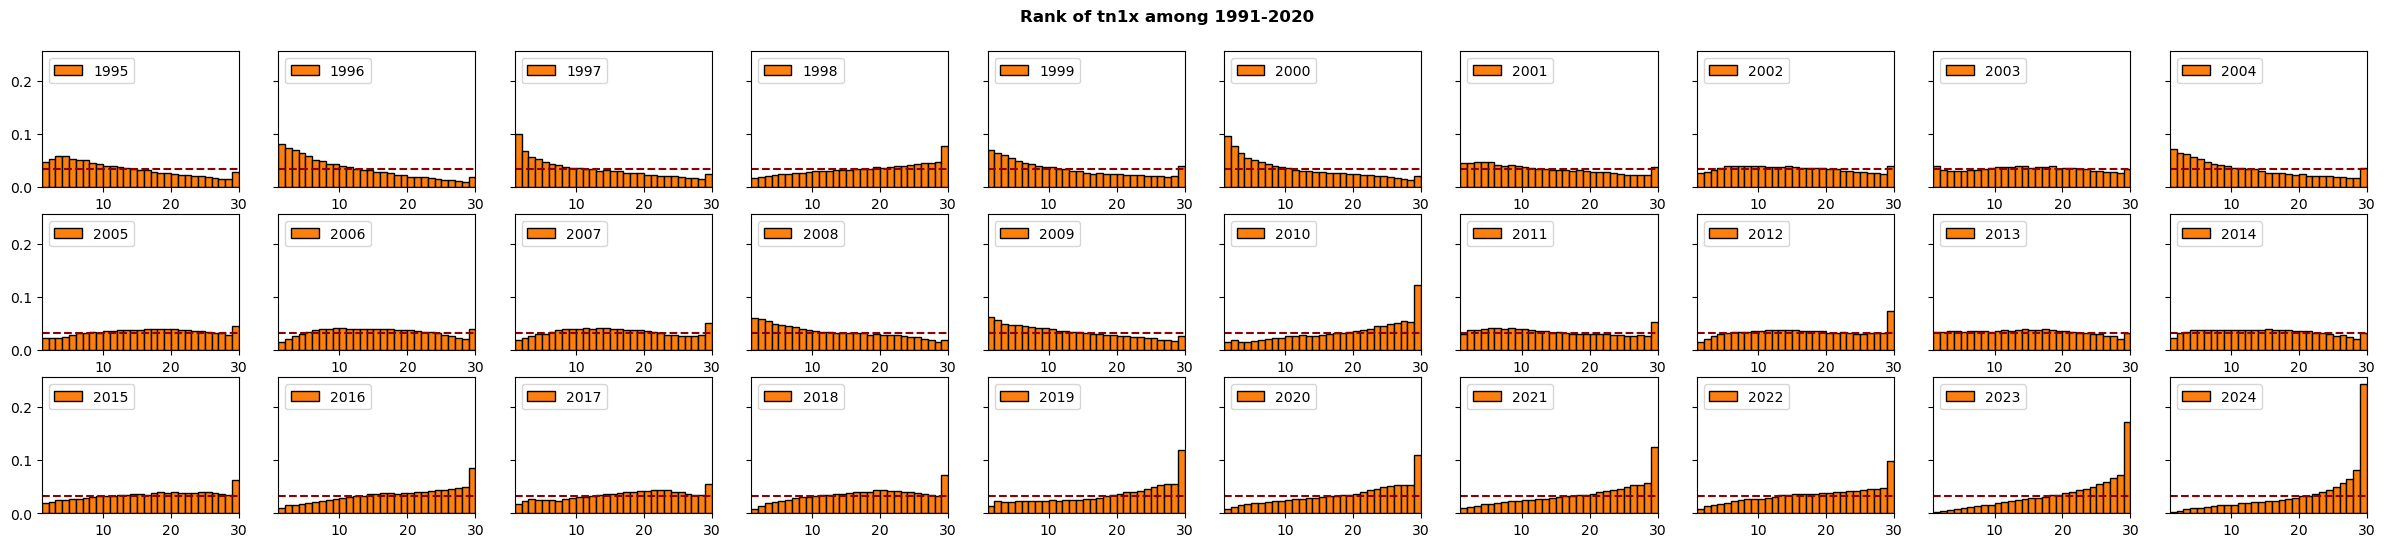

In [81]:
nc = 10; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*3,nr*2), dpi = 100, sharex = "row", sharey = True)
[compare_ranks(range(1995,2025)[i], None, ax = axs.flatten()[i], y1_col = "tab:orange") for i in range(min(nc*nr, 34))]
if nc*nr > 34: 
    for i in range(34, nc*nr): axs.flatten()[i].set_axis_off()
fig.suptitle("Rank among 1995-2024", fontweight = "bold", y = 0.95)

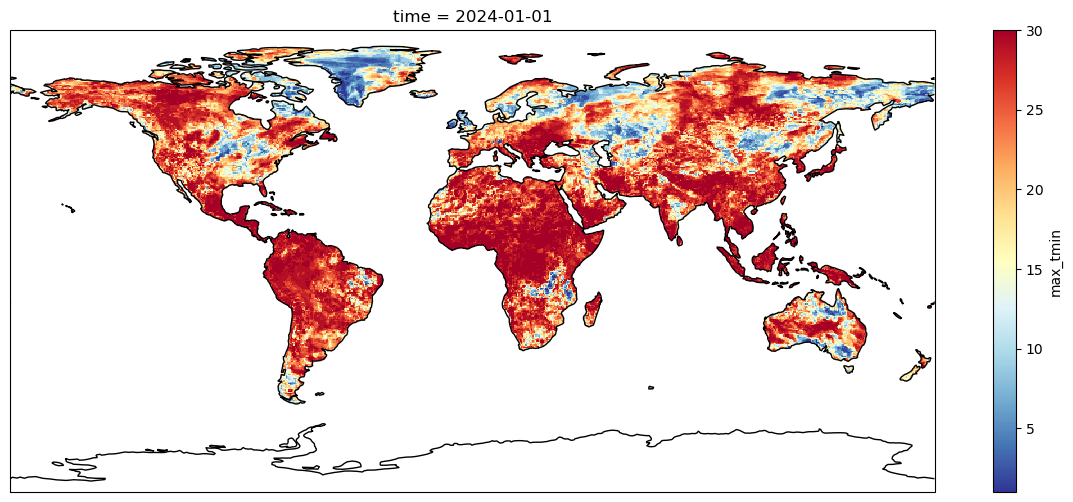

In [82]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar = ranks.sel(time = "2024").plot(ax = ax, vmin = 1, vmax = 30, cmap = "RdBu_r")
ax.coastlines()

# Monthly mean temperatures

In [ ]:
# # save mothly data as separate files
# da = decode_times(xr.open_dataset("data/era5_t2m_daily_12_mean_30.nc", decode_times = False))

# for i in range(12):
#     da_m = da.groupby("time.month")[i+1]
#     da_m.to_netcdf("data/era5_t2m_monthly_"+str(i+1).rjust(2, "0")+"_mean.nc")

In [109]:
ranks, ranks_flattened = get_ranks("data/era5_t2m_monthly_04_mean.nc")

Text(0.5, 0.95, 'Rank among 1995-2024')

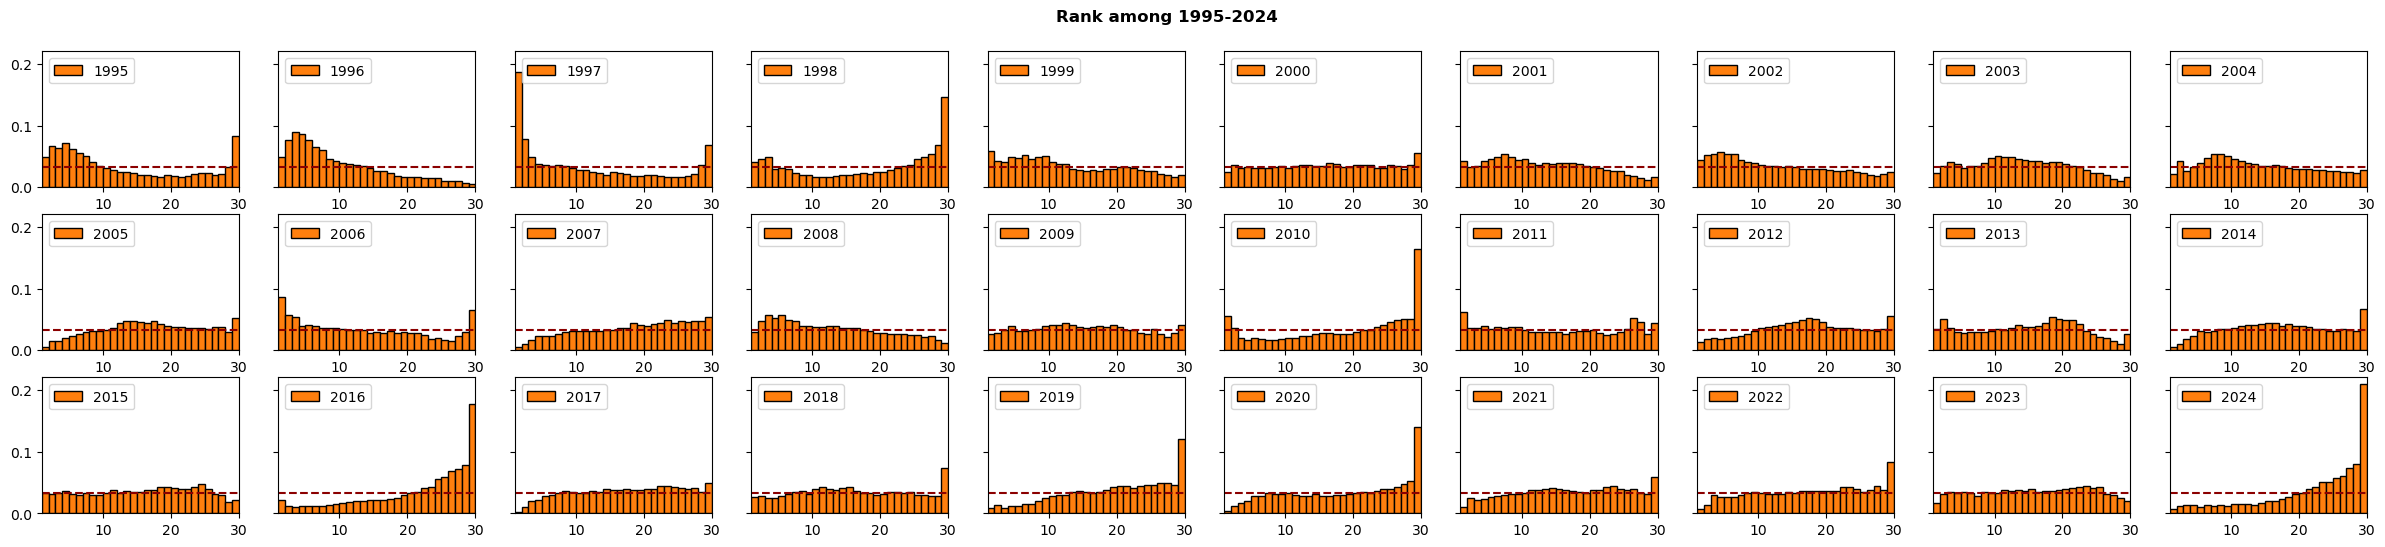

In [110]:
nc = 10; nr = 3
fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc*3,nr*2), dpi = 100, sharex = "row", sharey = True)
[compare_ranks(range(1995,2025)[i], None, ax = axs.flatten()[i], y1_col = "tab:orange") for i in range(min(nc*nr, 34))]
if nc*nr > 34: 
    for i in range(34, nc*nr): axs.flatten()[i].set_axis_off()
fig.suptitle("Rank among 1995-2024", fontweight = "bold", y = 0.95)

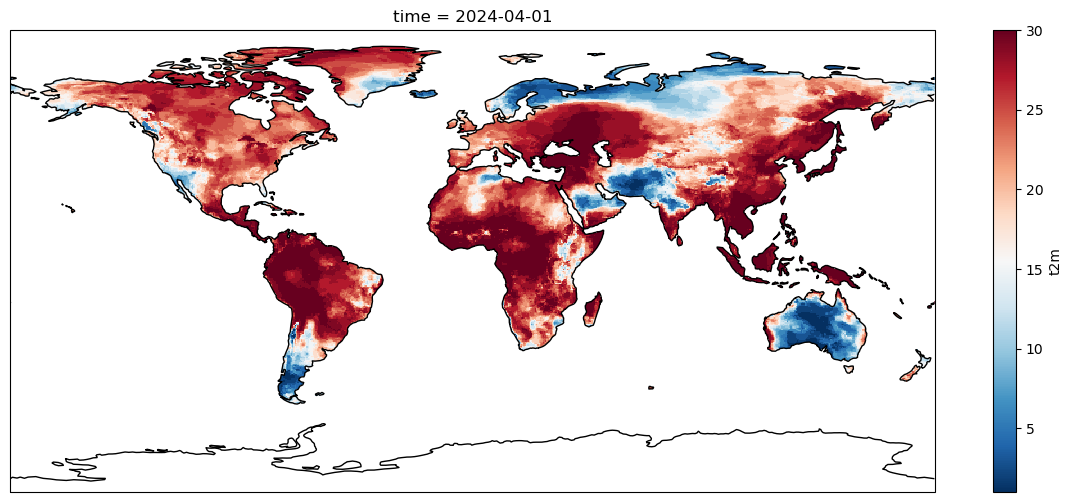

In [111]:
fig, ax = plt.subplots(figsize = (15,6), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar = ranks.sel(time = "2024").plot(ax = ax, vmin = 1, vmax = 30, cmap = "RdBu_r")
ax.coastlines()